# MNIST with RNN 

In [10]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0
print(X_train.shape)

(60000, 28, 28)


In [4]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1:]), activation='relu', return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 128)           80384     
_________________________________________________________________
dropout (Dropout)            (None, 28, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [6]:
opt = tf.keras.optimizers.Adam(lr=1e-3, decay = 1e-5)
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer = opt, 
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 101s 2ms/sample - loss: 0.6749 - accuracy: 0.7731 - val_loss: 0.1549 - val_accuracy: 0.9555
Epoch 2/10
60000/60000 [==============================] - 96s 2ms/sample - loss: 0.1725 - accuracy: 0.9536 - val_loss: 0.1070 - val_accuracy: 0.9694
Epoch 3/10
60000/60000 [==============================] - 96s 2ms/sample - loss: 0.1151 - accuracy: 0.9697 - val_loss: 0.1007 - val_accuracy: 0.9707
Epoch 4/10
60000/60000 [==============================] - 96s 2ms/sample - loss: 0.0889 - accuracy: 0.9770 - val_loss: 0.0809 - val_accuracy: 0.9758
Epoch 5/10
60000/60000 [==============================] - 94s 2ms/sample - loss: 0.0715 - accuracy: 0.9810 - val_loss: 0.0553 - val_accuracy: 0.9841
Epoch 6/10
60000/60000 [==============================] - 94s 2ms/sample - loss: 0.0595 - accuracy: 0.9846 - val_loss: 0.0638 - val_accuracy: 0.9824
Epoch 7/10
60000/60000 [==============================]

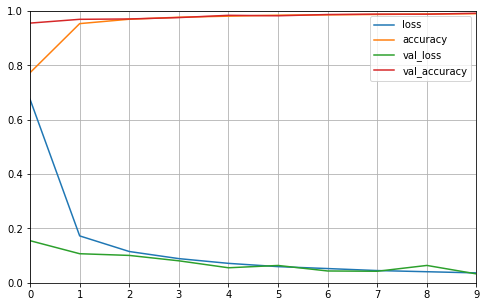

In [11]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [12]:
model_cu = Sequential()
model_cu.add(LSTM(128, input_shape=(X_train.shape[1:]), return_sequences = True))
model_cu.add(Dropout(0.2))
model_cu.add(LSTM(128))
model_cu.add(Dropout(0.2))
model_cu.add(Dense(32))
model_cu.add(Dropout(0.2))
model_cu.add(Dense(10, activation='softmax'))

In [13]:
model_cu.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 28, 128)           80384     
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [14]:
opt = tf.keras.optimizers.Adam(lr=1e-3, decay = 1e-5)
model_cu.compile(loss='sparse_categorical_crossentropy', 
              optimizer = opt, 
              metrics=['accuracy'])
history = model_cu.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 106s 2ms/sample - loss: 0.3314 - accuracy: 0.8942 - val_loss: 0.1087 - val_accuracy: 0.9673
Epoch 2/10
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.1013 - accuracy: 0.9715 - val_loss: 0.0717 - val_accuracy: 0.9785
Epoch 3/10
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0758 - accuracy: 0.9785 - val_loss: 0.0528 - val_accuracy: 0.9846
Epoch 4/10
60000/60000 [==============================] - 92s 2ms/sample - loss: 0.0576 - accuracy: 0.9841 - val_loss: 0.0673 - val_accuracy: 0.9782
Epoch 5/10
60000/60000 [==============================] - 92s 2ms/sample - loss: 0.0463 - accuracy: 0.9866 - val_loss: 0.0551 - val_accuracy: 0.9835
Epoch 6/10
60000/60000 [==============================] - 93s 2ms/sample - loss: 0.0392 - accuracy: 0.9887 - val_loss: 0.0457 - val_accuracy: 0.9872
Epoch 7/10
60000/60000 [==============================]

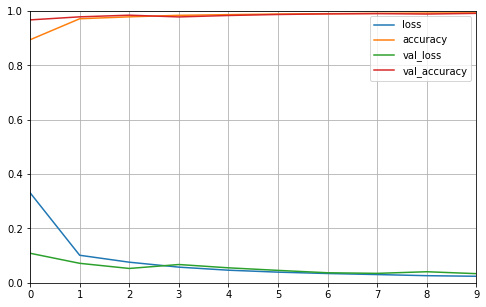

In [15]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()